In [1]:
import tensorflow as tf
import torch
import numpy as np
import cv2
import matplotlib
import sklearn

print(f"TensorFlow Version: {tf.__version__}")
print(f"PyTorch Version: {torch.__version__}")
print(f"NumPy Version: {np.__version__}")
print(f"OpenCV Version: {cv2.__version__}")
print(f"Matplotlib Version: {matplotlib.__version__}")
print(f"Scikit-learn Version: {sklearn.__version__}")


TensorFlow Version: 2.17.0
PyTorch Version: 2.3.1+cpu
NumPy Version: 1.26.4
OpenCV Version: 4.10.0
Matplotlib Version: 3.9.2
Scikit-learn Version: 1.4.2


In [2]:
train_dir = 'train'  
val_dir = 'val'     
test_dir = 'test'    


In [3]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, horizontal_flip=True, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
val_generator = train_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')


Found 16823 images belonging to 1 classes.
Found 5233 images belonging to 1 classes.
Found 43 images belonging to 1 classes.


In [4]:

for dir_path in [train_dir, val_dir, test_dir]:
    for class_dir in os.listdir(dir_path):
        class_path = os.path.join(dir_path, class_dir)
        if not os.path.isdir(class_path):
            continue
        missing_files = [f for f in os.listdir(class_path) if not os.path.isfile(os.path.join(class_path, f))]
        if missing_files:
            print(f"Missing files in {class_dir}: {missing_files}")


Missing files in train: ['0', '1', '10', '100', '101', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']
Missing files in val: ['0', '1', '10', '100', '101', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6',

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,              
    rotation_range=40,          
    width_shift_range=0.2,       
    height_shift_range=0.2,      
    shear_range=0.2,             
    zoom_range=0.2,              
    horizontal_flip=True,        
    brightness_range=[0.8, 1.2], 
    channel_shift_range=0.2,     
    validation_split=0.2         
)

# Apply the augmentation to the training set
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # This subset is for training
)

# Apply the augmentation to the validation set (without augmentation effects)
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  
)


Found 13459 images belonging to 1 classes.
Found 3364 images belonging to 1 classes.


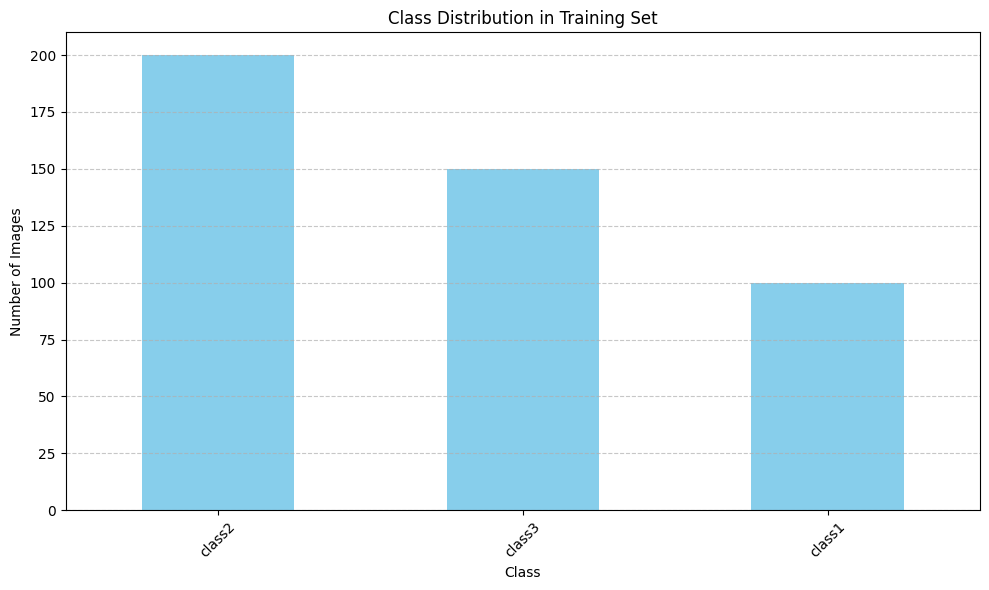

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace with your actual data)
train_class_counts = {
    'class1': 100,
    'class2': 200,
    'class3': 150
}

train_class_counts = pd.Series(train_class_counts).sort_values(ascending=False)

# Create the plot
plt.figure(figsize=(10, 6))  
train_class_counts.plot(kind='bar', color='skyblue') 

# Add labels and title
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Number of Images')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()  
plt.show()

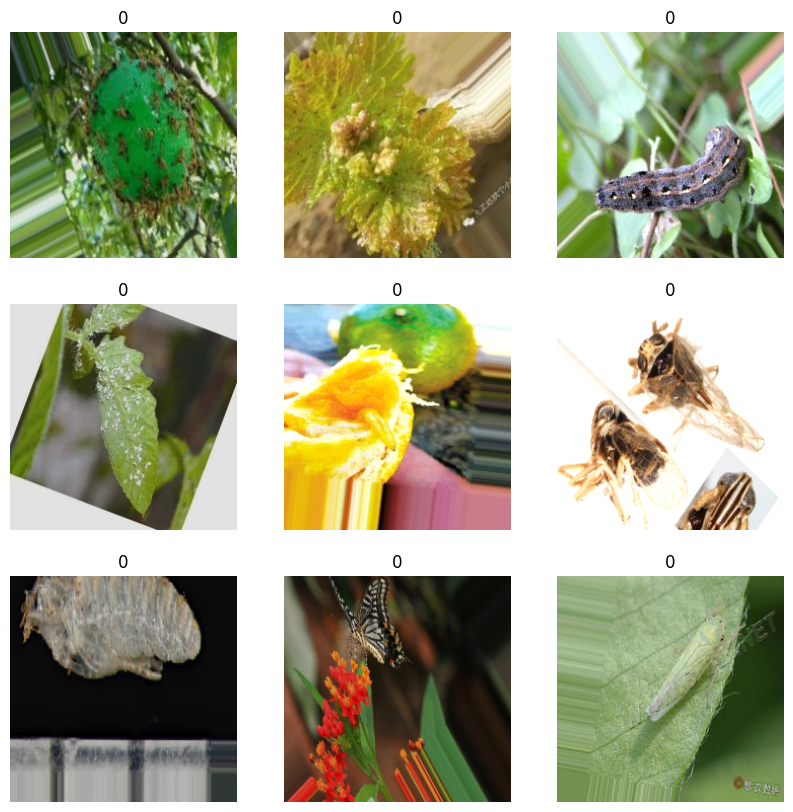

In [11]:
import matplotlib.pyplot as plt
import numpy as np

sample_batch = next(train_generator)
images, labels = sample_batch

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(np.argmax(labels[i]))
    plt.axis('off')
plt.show()


In [12]:
import os

def list_files(directory):
    files = []
    for root, _, filenames in os.walk(directory):
        for filename in filenames:
            files.append(os.path.join(root, filename))
    return files

train_files = list_files(train_dir)
val_files = list_files(val_dir)
test_files = list_files(test_dir)

print(f"Number of training files: {len(train_files)}")
print(f"Number of validation files: {len(val_files)}")
print(f"Number of test files: {len(test_files)}")


Number of training files: 16823
Number of validation files: 5233
Number of test files: 43


In [14]:
import os

def list_image_files(directory):
    image_files = []
    for root, _, filenames in os.walk(directory):
        for filename in filenames:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
                image_files.append(os.path.join(root, filename))
    return image_files


train_dir = 'train'
val_dir = 'val'
test_dir = 'test'

train_files = list_image_files(train_dir)
val_files = list_image_files(val_dir)
test_files = list_image_files(test_dir)

print(f"Total training files found: {len(train_files)}")
print(f"Total validation files found: {len(val_files)}")
print(f"Total test files found: {len(test_files)}")


Total training files found: 16823
Total validation files found: 5233
Total test files found: 43


In [15]:
from PIL import Image

def check_corrupted_images(image_files):
    corrupted_files = []
    for file in image_files:
        try:
            with Image.open(file) as img:
                img.verify()  
        except (IOError, SyntaxError) as e:
            corrupted_files.append(file)
    return corrupted_files

# Check each dataset for corrupted images
corrupted_train_files = check_corrupted_images(train_files)
corrupted_val_files = check_corrupted_images(val_files)
corrupted_test_files = check_corrupted_images(test_files)

print(f"Corrupted training files: {len(corrupted_train_files)}")
print(f"Corrupted validation files: {len(corrupted_val_files)}")
print(f"Corrupted test files: {len(corrupted_test_files)}")

# Optionally, print the paths of corrupted files
print("Corrupted Training Files:", corrupted_train_files)
print("Corrupted Validation Files:", corrupted_val_files)
print("Corrupted Test Files:", corrupted_test_files)


Corrupted training files: 0
Corrupted validation files: 0
Corrupted test files: 0
Corrupted Training Files: []
Corrupted Validation Files: []
Corrupted Test Files: []


In [37]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import io
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.decomposition import PCA


train_dir = 'train'  
val_dir = 'val'      
test_dir = 'test'    


vgg_model = VGG16(weights='imagenet', include_top=False, pooling='avg')

def extract_hog_features(image_path):
    try:
        img = io.imread(image_path)
        fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
                            cells_per_block=(1, 1), visualize=True, multichannel=True)
        return fd.flatten()
    except Exception as e:
        print(f"Error extracting HOG features from {image_path}: {e}")
        return None

def extract_deep_features(image_path, model):
    try:
        img = image.load_img(image_path, target_size=(224, 224))  
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        
        features = model.predict(img_array)
        return features.flatten()
    except Exception as e:
        print(f"Error extracting deep features from {image_path}: {e}")
        return None

def process_images(directory, model):
    hog_features_list = []
    deep_features_list = []

    if not os.path.exists(directory):
        raise FileNotFoundError(f"Directory {directory} does not exist.")

    files = os.listdir(directory)
    if not files:
        raise ValueError(f"No files found in directory {directory}.")

    for img_file in files:
        img_path = os.path.join(directory, img_file)
        
       
        if os.path.isfile(img_path):
            hog_features = extract_hog_features(img_path)
            deep_features = extract_deep_features(img_path, model)

            if hog_features is not None and deep_features is not None:
                combined_features = np.concatenate((hog_features, deep_features))
                hog_features_list.append(hog_features)
                deep_features_list.append(deep_features)
            else:
                print(f"Skipping {img_path} due to feature extraction error.")

    
    return np.array(hog_features_list), np.array(deep_features_list)


try:
    hog_features_train, deep_features_train = process_images(train_dir, vgg_model)

    if hog_features_train.size == 0 or deep_features_train.size == 0:
        raise ValueError("No features extracted. Check your image directory and processing code.")

   
    all_features_train = np.concatenate((hog_features_train, deep_features_train), axis=1)
    pca = PCA(n_components=50)
    features_reduced = pca.fit_transform(all_features_train)

    print(f'Final reduced features shape: {features_reduced.shape}')
except Exception as e:
    print(f"An error occurred: {e}")


An error occurred: No features extracted. Check your image directory and processing code.


In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam


train_dir = 'train'
val_dir = 'val'


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse' 
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'  
)

# Load the base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Found 16823 images belonging to 1 classes.
Found 5233 images belonging to 1 classes.
Epoch 1/10


c:\Users\suraj_r3os3ti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


526/526 ━━━━━━━━━━━━━━━━━━━━ 10082s 19s/step - accuracy: 0.9870 - loss: 0.0576 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
 16/526 ━━━━━━━━━━━━━━━━━━━━ 2:09:06 15s/step - accuracy: 1.0000 - loss: 0.0000e+00

In [1]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


NameError: name 'model' is not defined